In [1]:
# importing numpy library
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
class Linear_Regression():

   def __init__( self, learning_rate, no_of_iterations ) :
          
        self.learning_rate = learning_rate
          
        self.no_of_iterations = no_of_iterations

    # fit function to train the model

   def fit( self, X, Y ) :
          
        # no_of_training_examples, no_of_features
          
        self.m, self.n = X.shape
          
        # initiating the weight and bias
          
        self.w = np.zeros( self.n )
          
        self.b = 0
          
        self.X = X
          
        self.Y = Y


        # implementing Gradient Descent for Optimization
                  
        for i in range( self.no_of_iterations ) :
              
            self.update_weights()
              
        
      
    # function to update weights in gradient descent
      
   def update_weights( self ) :
             
        Y_prediction = self.predict( self.X )
          
        # calculate gradients  
      
        dw = - ( 2 * ( self.X.T ).dot( self.Y - Y_prediction )  ) / self.m
       
        db = - 2 * np.sum( self.Y - Y_prediction ) / self.m 
          
        # updating the weights
      
        self.w = self.w - self.learning_rate * dw
      
        self.b = self.b - self.learning_rate * db
          
      
    # Line function for prediction:
      
   def predict( self, X ) :
      
        return X.dot( self.w ) + self.b


In [3]:
df_happiness = pd.read_csv('https://raw.githubusercontent.com/tugcecalisir/Data-Science-Python/main/Happiness_and_Corruption/WorldHappiness_Corruption_2015_2020.csv', encoding="ISO-8859-1")
df_happiness.head()

,Country,happiness_score,gdp_per_capita,family,health,freedom,generosity,government_trust,dystopia_residual,continent,Year,social_support,cpi_score
0,Norway,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,Europe,2015,0.0,88
1,Denmark,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,Europe,2015,0.0,91
2,Iceland,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,Europe,2015,0.0,79
3,Switzerland,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,Europe,2015,0.0,86
4,Finland,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,Europe,2015,0.0,90


In [4]:
df_happiness.tail()

,Country,happiness_score,gdp_per_capita,family,health,freedom,generosity,government_trust,dystopia_residual,continent,Year,social_support,cpi_score
787,Botswana,3.4789,0.997549,0.0,0.494102,0.509089,0.033407,0.101786,0.257241,Africa,2020,1.085695,60
788,Tanzania,3.4762,0.457163,0.0,0.442678,0.509343,0.271541,0.203881,0.718963,Africa,2020,0.872675,38
789,Rwanda,3.3123,0.343243,0.0,0.572383,0.604088,0.235705,0.485542,0.548445,Africa,2020,0.522876,54
790,Zimbabwe,3.2992,0.425564,0.0,0.375038,0.377405,0.151349,0.080929,0.841031,Africa,2020,1.047835,24
791,Afghanistan,2.5669,0.300706,0.0,0.266052,0.000000,0.135235,0.001226,1.507236,Asia,2020,0.356434,19


In [5]:
df_happiness.shape

(792, 13)

In [6]:
df_happiness.isnull().sum()

Country              0
happiness_score      0
gdp_per_capita       0
family               0
health               0
freedom              0
generosity           0
government_trust     0
dystopia_residual    0
continent            0
Year                 0
social_support       0
cpi_score            0
dtype: int64

In [7]:
X = df_happiness.iloc[:,2].values.reshape((-1, 1))
Y = df_happiness.iloc[:,1].values

In [8]:
print(X)

[[1.61646318]
 [1.48238301]
 [1.48063302]
 [1.56497955]
 [1.44357193]
 [1.50394464]
 [1.47920442]
 [1.40570605]
 [1.49438727]
 [1.48441493]
 [1.37538242]
 [1.10970628]
 [1.48709726]
 [1.54625928]
 [1.53570664]
 [1.48792338]
 [1.46378076]
 [1.7419436 ]
 [1.44163394]
 [1.25278461]
 [1.62634337]
 [1.10735321]
 [1.18529546]
 [1.15318382]
 [1.69227767]
 [1.34327984]
 [0.87200195]
 [1.2175597 ]
 [1.23374844]
 [1.43092346]
 [1.12786877]
 [1.38439786]
 [1.07062232]
 [1.53062356]
 [1.63295245]
 [1.32539356]
 [1.48841226]
 [1.29121542]
 [0.7372992 ]
 [1.0008204 ]
 [0.9097845 ]
 [1.29178786]
 [0.78644109]
 [1.39506662]
 [1.2817781 ]
 [1.41691518]
 [1.31458235]
 [1.09186447]
 [1.26074862]
 [0.72887063]
 [1.21768391]
 [0.83375657]
 [1.13077676]
 [1.28455627]
 [1.34120595]
 [1.03522527]
 [1.18939555]
 [1.35593808]
 [1.32087934]
 [1.15655756]
 [1.10180306]
 [1.19827437]
 [0.93253732]
 [0.85769922]
 [1.06931758]
 [0.99101239]
 [1.28601193]
 [0.92557931]
 [1.22255623]
 [0.95148438]
 [1.08116579]
 [0.72

In [9]:
print(Y)

[7.53700018 7.52199984 7.50400019 7.49399996 7.46899986 7.37699986
 7.31599999 7.31400013 7.28399992 7.28399992 7.21299982 7.079
 7.00600004 6.99300003 6.97700024 6.95100021 6.89099979 6.86299992
 6.71400023 6.65199995 6.64799976 6.63500023 6.59899998 6.57800007
 6.57200003 6.52699995 6.454      6.454      6.45200014 6.44199991
 6.42399979 6.40299988 6.35699987 6.34399986 6.10500002 6.09800005
 6.08699989 6.08400011 6.0710001  6.0079999  6.00299978 5.97300005
 5.9710002  5.96400023 5.96299982 5.92000008 5.90199995 5.87200022
 5.8499999  5.83799982 5.82499981 5.82299995 5.82200003 5.81899977
 5.7579999  5.71500015 5.62900019 5.62099981 5.61100006 5.56899977
 5.5250001  5.5        5.49300003 5.42999983 5.39499998 5.33599997
 5.32399988 5.31099987 5.29300022 5.2789998  5.27299976 5.26900005
 5.26200008 5.25       5.23699999 5.23500013 5.23400021 5.23000002
 5.22700024 5.2249999  5.19500017 5.18200016 5.18100023 5.07399988
 5.07399988 5.04099989 5.00400019 4.96199989 4.95499992 4.829
 4.80

In [10]:
#splitting the dataset into training & test data

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 2)

In [11]:
# Training the Linear Regression model

model = Linear_Regression(learning_rate = 0.02, no_of_iterations = 1000)

In [12]:
model.fit(X_train, Y_train)

In [13]:
# printing the parameter values ( weights & bias)

print('weight = ', model.w[0])
print('bias = ', model.b)

weight =  2.316247315534768
bias =  3.308623185388402


In [14]:
test_data_prediction = model.predict(X_test)

In [15]:
print(test_data_prediction)

[4.54086676 5.44070568 5.59749669 6.75502173 5.66424671 3.91256151
 5.33040598 5.97548086 3.48465798 5.04335439 7.07563665 5.3777964
 5.10371485 4.3324045  5.78932512 4.02202736 5.28527066 5.38859202
 6.56458605 6.68107928 4.40717296 4.03853211 6.75874305 5.68083104
 5.58322138 6.31851708 5.76152909 6.29716128 5.40453232 6.86794496
 5.30990719 5.56552824 5.96999135 4.40652441 6.6625493  5.56696432
 5.6756282  6.66224819 5.46861024 6.16288843 5.43493822 3.55954303
 6.14036578 5.99526161 4.68273691 5.14360352 4.87924948 6.33132593
 4.12025941 5.37036125 6.35489443 6.26827768 3.46684604 5.75156623
 6.1943199  6.39752428 6.64780393 5.2334247  4.11930975 3.41517056
 5.74299911 4.01610869 4.51925617 5.11630275 5.45249378 5.66193046
 4.6798416  6.05406062 5.59126175 5.16162104 6.30353096 4.05445482
 3.94327495 6.29939744 5.52244604 5.9210462  5.85109331 6.41471084
 5.24268969 4.19405505 5.51047722 5.17551852 5.66193046 5.91407714
 5.80871994 5.9676751  6.6713742  4.3603616  5.57622931 5.68926

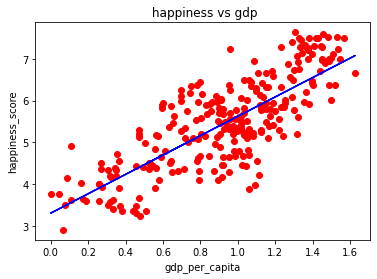

In [16]:
plt.scatter(X_test, Y_test, color = 'red')
plt.plot(X_test, test_data_prediction, color='blue')
plt.xlabel('gdp_per_capita')
plt.ylabel('happiness_score')
plt.title(' happiness vs gdp')
plt.show()